# [Project 1] 의류 판매 상품 리뷰 분석을 통한 상품 추천 여부 예측

---

## 프로젝트 목표
- 상품 리뷰 데이터 분석을 통하여 상품 추천 여부를 예측하는 분류 모델 수행
- 상품 추천 여부에 영향을 미치는 특성 데이터들에 대한 데이터 분석 수행

---

## 프로젝트 목차

1. **데이터 읽기:** 이커머스 데이터를 불러오고 Dataframe 구조를 확인


2. **데이터 정제:** 비어 있는 데이터 또는 쓸모 없는 데이터를 삭제<br>
    2.1. 결측값 확인<br>
    2.2. 결측값 처리<br>


3. **데이터 시각화:** 변수 시각화를 통하여 분포 파악<br>
    3.1. `Title` word cloud<br>
    3.2. `Review Text` word cloud<br>
    3.3. `Recommended IND` 시각화<br>


4. **데이터 전 처리:** 머신러닝 모델에 필요한 입력값 형식으로 데이터 처리<br>
    4.1. 자연어 전 처리 - Tfidf<br>
    4.2. 학습, 테스트 데이터 분리<br>


5. **머신러닝 모델 학습:** 분류 모델을 사용하여 학습 수행<br>
    5.1. 기본 분류 모델 학습 - 의사결정나무<br>
    5.2. 다양한 분류 모델 학습<br>


6. **평가 및 예측:** 학습된 모델을 바탕으로 평가 및 예측 수행<br>
    6.1. Confusion Matrix<br>
    6.2. Precision & Recall<br>
    6.3. 테스트 데이터의 예측값 출력

---

## 데이터 출처 
- https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews

---

## 프로젝트 개요

언택트 시대가 다가오면서 의류, 식료품, 전자제품 등 다양한 상품을 인터넷을 통하여 거래하게 되었습니다. 수많은 상품이 인터넷상에서 전시되어 있지만, 실제로 사용한 상품이 아니라면 나에게 맞는 상품인지를 알기 쉽지 않습니다. 이러한 단점을 극복하기 위하여 수많은 이커머스 웹사이트에서는 상품 리뷰 글을 남길 수 있도록 하고 최대한 많은 리뷰가 나올 수 있도록 장려하고 있습니다. 소비자는 이러한 리뷰를 통하여 실제 후기와 상품 정보에서 미쳐 파악하지 못한 정보들을 얻을 수 있으며, 긍정적인 리뷰가 많은 상품에 대해서는 신뢰도 또한 가질 수 있게 됩니다. 판매자 입장에서도 리뷰가 많은 상품을 마케팅 요소로 사용할 수 있으며, 소비자의 의견을 들을 수 있는 장점이 있습니다. 따라서 이커머스에서는 리뷰는 상품을 구매하는 데 있어서 매우 중요한 특성 데이터로서 가치가 있습니다.

이번 프로젝트에서는 Kaggle에서 제공하는 여성 의류 이커머스 데이터를 바탕으로 상품 추천 여부를 예측해보는 분류 모델을 구현합니다. 이를 통하여 새로운 리뷰와 여성 의류 정보를 받았을 때, 해당 상품을 추천하는지를 예측할 수 있습니다. 이를 활용하면 상품 추천 여부가 없는 상품들에 대해서도 리뷰와 의류 정보를 바탕으로 상품 추천 여부를 예측할 수 있으며, 이는 상품의 중요한 지표로서 다시 활용될 수 있습니다. 

---

In [1]:
!pip install wordcloud

     |████████████████████████████████| 371 kB 1.7 MB/s eta 0:00:01


## 1. 데이터 읽기

pandas를 사용하여 `Womens Clothing E-Commerce Reviews(수정).csv` 데이터를 읽고 dataframe 형태로 저장해 봅시다.

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Womens Clothing E-Commerce Reviews(수정).csv 데이터를 pandas를 사용하여 dataframe 형태로 불러옵니다.
df_origin = pd.read_csv("./data/Womens Clothing E-Commerce Reviews(수정).csv")

In [4]:
# 5개의 데이터 샘플을 출력합니다.
df_origin.head()

,Unnamed: 0,Unnamed: 0.1,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,0,0,Initmates,Intimate,Intimates
1,1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,0,4,General,Dresses,Dresses
2,2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,1,0,General,Dresses,Dresses
3,3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,0,0,General Petite,Bottoms,Pants
4,4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,0,6,General,Tops,Blouses


In [5]:
# dataframe의 정보를 요약해서 출력합니다.
df_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Unnamed: 0.1             23486 non-null  int64 
 2   Clothing ID              23486 non-null  int64 
 3   Age                      23486 non-null  int64 
 4   Title                    19676 non-null  object
 5   Review Text              22641 non-null  object
 6   Rating                   23486 non-null  int64 
 7   Recommended IND          23486 non-null  int64 
 8   Positive Feedback Count  23486 non-null  int64 
 9   Division Name            23472 non-null  object
 10  Department Name          23472 non-null  object
 11  Class Name               23472 non-null  object
dtypes: int64(7), object(5)
memory usage: 2.2+ MB


In [6]:
# 수치형 변수의 데이터 정보를 요약하여 출력합니다.
df_origin.describe()

,Unnamed: 0,Unnamed: 0.1,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,11742.500000,918.118709,43.198544,4.196032,0.177638,2.535936
std,6779.968547,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,5871.250000,861.000000,34.000000,4.000000,0.000000,0.000000
50%,11742.500000,11742.500000,936.000000,41.000000,5.000000,0.000000,1.000000
75%,17613.750000,17613.750000,1078.000000,52.000000,5.000000,0.000000,3.000000
max,23485.000000,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


## 2. 데이터 정제

일반적으로 데이터 정제에서는 **결측값(missing value)** 또는 **이상치(outlier)**를 처리합니다.

이상치 데이터는 각 변수의 특성에 맞게 처리하는 것이 좋기에 각 변수를 살펴보는 데이터 시각화를 수행하며 필요하게 된다면 추가 적으로 수행하겠습니다.

따라서 이번 파트에서는 간단하게 결측값에 대해서만 처리를 수행하겠습니다.

In [7]:
# 결측값을 처리하기 전에 우선 의미 없는 변수인 'Unnamed: 0, Unnamed: 0.1'를 drop을 사용하여 삭제합니다.
df_clean = df_origin.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1'])

In [17]:
df_clean

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,0,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,0,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,1,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,0,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,0,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,0,0,General Petite,Dresses,Dresses
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,0,0,General Petite,Tops,Knits
23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,1,1,General Petite,Dresses,Dresses
23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,0,2,General,Dresses,Dresses


### 2.1. 결측값 확인

아래 코드를 수행하여 각 변수별로 결측값이 몇개가 있는지 확인합니다.

In [8]:
# 결측값 정보를 출력합니다.
df_clean.isnull().sum()

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [9]:
# 아래 3개의 변수들의 결측값 정보를 알아보고 싶어서 그 데이터들을 출력합니다.
df_clean[df_clean['Division Name'].isnull()]

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
9444,72,25,My favorite socks!!!,"I never write reviews, but these socks are so ...",5,0,0,NaN,NaN,NaN
13767,492,23,So soft!,I just love this hoodie! it is so soft and com...,5,0,1,NaN,NaN,NaN
13768,492,49,Wardrobe staple,Love this hoodie. so soft and goes with everyt...,5,0,0,NaN,NaN,NaN
13787,492,48,NaN,NaN,5,0,0,NaN,NaN,NaN
16216,152,36,Warm and cozy,"Just what i was looking for. soft, cozy and warm.",5,0,0,NaN,NaN,NaN
16221,152,37,Love!,I am loving these. they are quite long but are...,5,0,0,NaN,NaN,NaN
16223,152,39,"""long and warm""",These leg warmers are perfect for me. they are...,5,0,0,NaN,NaN,NaN
18626,184,34,Nubby footless tights,"These are amazing quality. i agree, size up to...",5,0,5,NaN,NaN,NaN
18671,184,54,New workhorse,These tights are amazing! if i care for them w...,5,0,0,NaN,NaN,NaN
20088,772,50,Comfy sweatshirt!,This sweatshirt is really nice! it's oversize...,5,0,0,NaN,NaN,NaN


### 2.2. 결측값 처리

이번 실습에서는 `Review Text` 에 있는 데이터만을 머신러닝 입력으로 사용할 것입니다. 그렇기에 `Review Text`의 결측값이 있는 샘플을 삭제합니다.

만약 `Review Text` 이외의 데이터를 추가로 사용한다면 추가로 결측값 처리가 수행되어야 할 것입니다.

In [10]:
# 결측값이 아닌 부분을 골라내어 df_clasn에 저장합니다.
df_clean = df_clean[~df_clean['Review Text'].isnull()]

In [11]:
# 결측값 정보를 출력합니다.
df_clean.isnull().sum()

Clothing ID                   0
Age                           0
Title                      2966
Review Text                   0
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                13
Department Name              13
Class Name                   13
dtype: int64

## 3. 데이터 시각화

각 변수 분포를 알아보기 위하여 시각화를 수행하겠습니다.

일반적으로는 막대그래프를 그리는 방법으로 시각화를 수행하나,

문자열로 이루어진 `Title` 데이터와 `Review Text` 데이터는 word cloud란 방식을 사용하여 시각화를 수행하겠습니다.

### 3.1. `Title` word cloud

In [12]:
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter
from nltk.tokenize import RegexpTokenizer
import re

In [13]:
# 'Title'의 결측값을 삭제합니다.
df_clean_title = df_clean[~df_clean['Title'].isnull()]

# findall 함수를 사용하여 띄어 쓰기 단위로 글자만을 가져옵니다.(소문자로 변환도 수행)
tokens = re.findall("[\w']+", df_clean_title['Title'].str.lower().str.cat(sep=' ')) 

In [18]:
df_clean_title['Title'].str.lower()

2                                  some major design flaws
3                                         my favorite buy!
4                                         flattering shirt
5                                  not for the very petite
6                                     cagrcoal shimmer fun
                               ...                        
23481                       great dress for many occasions
23482                           wish it was made of cotton
23483                                cute, but see through
23484    very cute dress, perfect for summer parties an...
23485                      please make more like this one!
Name: Title, Length: 19675, dtype: object

In [19]:
df_clean_title['Title'].str.cat(sep=' ')

'Some major design flaws My favorite buy! Flattering shirt Not for the very petite Cagrcoal shimmer fun Shimmer, surprisingly goes with lots Flattering Such a fun dress! Dress looks like it\'s made of cheap material Perfect!!! Runs big Pretty party dress with some issues Nice, but not for my body You need to be at least average height, or taller Looks great with white pants Super cute and cozy Stylish and comfortable Cute, crisp shirt I\'m torn! Not what it looks like Like it, but don\'t love it. Versatile Falls flat Huge disappointment Loved, but returned Great shirt!!! Great layering piece Cuter in oerson! Love these pants Mehh Love this dress! Lovely! Beautifully cut lightweight coat Soft & lovely Some things you should know... Beautiful! Love the two tone design Love the color! Love the embroidery! Cute for fall Love Flattering and comfortable Cute top Soft and cute as can be! Boring front, great back Soft and comfortable Gorgeous dress! Itchy tags Must have Cute top! love the bran

In [14]:
# nltk에서 지원하는 'stopwords'를 다운받습니다.
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [15]:
# 영어 'stopwords'를 가져옵니다.
en_stops = set(stopwords.words('english'))

# tokens에서 'stopwords'에 해당되지 않는 단어를 골라내어 filtered_sentence에 저장합니다.
filtered_sentence = [token for token in tokens if not token in en_stops]
filtered_sentence

['major',
 'design',
 'flaws',
 'favorite',
 'buy',
 'flattering',
 'shirt',
 'petite',
 'cagrcoal',
 'shimmer',
 'fun',
 'shimmer',
 'surprisingly',
 'goes',
 'lots',
 'flattering',
 'fun',
 'dress',
 'dress',
 'looks',
 'like',
 'made',
 'cheap',
 'material',
 'perfect',
 'runs',
 'big',
 'pretty',
 'party',
 'dress',
 'issues',
 'nice',
 'body',
 'need',
 'least',
 'average',
 'height',
 'taller',
 'looks',
 'great',
 'white',
 'pants',
 'super',
 'cute',
 'cozy',
 'stylish',
 'comfortable',
 'cute',
 'crisp',
 'shirt',
 "i'm",
 'torn',
 'looks',
 'like',
 'like',
 'love',
 'versatile',
 'falls',
 'flat',
 'huge',
 'disappointment',
 'loved',
 'returned',
 'great',
 'shirt',
 'great',
 'layering',
 'piece',
 'cuter',
 'oerson',
 'love',
 'pants',
 'mehh',
 'love',
 'dress',
 'lovely',
 'beautifully',
 'cut',
 'lightweight',
 'coat',
 'soft',
 'lovely',
 'things',
 'know',
 'beautiful',
 'love',
 'two',
 'tone',
 'design',
 'love',
 'color',
 'love',
 'embroidery',
 'cute',
 'fall',


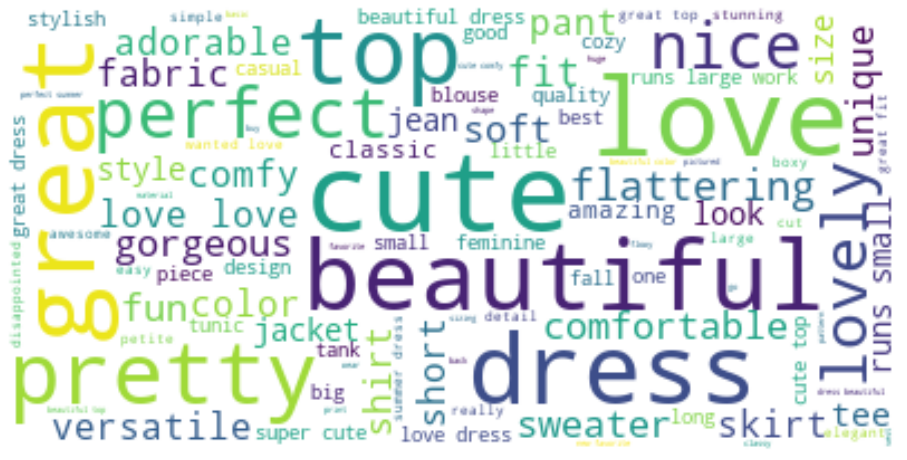

In [16]:
# 출력 사이즈를 설정합니다.
plt.rcParams['figure.figsize'] = (16, 16)

# wordcloud를 저장합니다.
wordcloud = WordCloud(max_font_size=50, max_words=100,background_color="white").generate(' '.join(filtered_sentence))

# wordcloud를 출력합니다.
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

### 3.2. `Review Text` word cloud

In [20]:
# findall 함수를 사용하여 띄어 쓰기 단위로 글자만을 가져옵니다.(소문자로 변환도 수행)
tokens = re.findall("[\w']+", df_clean['Review Text'].str.lower().str.cat(sep=' ')) 

# tokens에서 'stopwords'에 해당되지 않는 단어를 골라내어 filtered_sentence에 저장합니다.
filtered_sentence = [token for token in tokens if not token in en_stops]
filtered_sentence

['absolutely',
 'wonderful',
 'silky',
 'sexy',
 'comfortable',
 'love',
 'dress',
 'sooo',
 'pretty',
 'happened',
 'find',
 'store',
 "i'm",
 'glad',
 'bc',
 'never',
 'would',
 'ordered',
 'online',
 'bc',
 'petite',
 'bought',
 'petite',
 "5'8",
 'love',
 'length',
 'hits',
 'little',
 'knee',
 'would',
 'definitely',
 'true',
 'midi',
 'someone',
 'truly',
 'petite',
 'high',
 'hopes',
 'dress',
 'really',
 'wanted',
 'work',
 'initially',
 'ordered',
 'petite',
 'small',
 'usual',
 'size',
 'found',
 'outrageously',
 'small',
 'small',
 'fact',
 'could',
 'zip',
 'reordered',
 'petite',
 'medium',
 'ok',
 'overall',
 'top',
 'half',
 'comfortable',
 'fit',
 'nicely',
 'bottom',
 'half',
 'tight',
 'layer',
 'several',
 'somewhat',
 'cheap',
 'net',
 'layers',
 'imo',
 'major',
 'design',
 'flaw',
 'net',
 'layer',
 'sewn',
 'directly',
 'zipper',
 'c',
 'love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'flirty',
 'fabulous',
 'every',
 'time',
 'wear',
 'get',
 'nothing',
 'great',

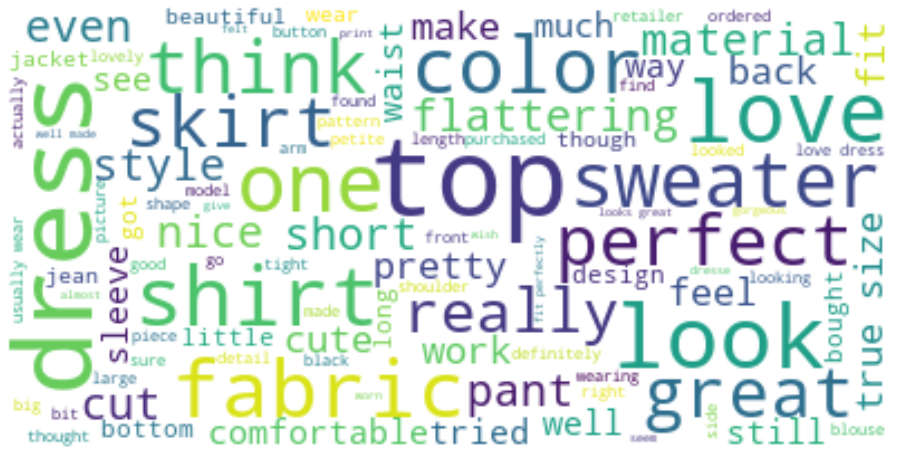

In [21]:
# 출력 사이즈를 설정합니다.
plt.rcParams['figure.figsize'] = (16, 16)

# wordcloud를 저장합니다.
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(' '.join(filtered_sentence))

# wordcloud를 출력합니다.
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

### 3.3. `Recommended IND` 시각화

0    18540
1     4101
Name: Recommended IND, dtype: int64

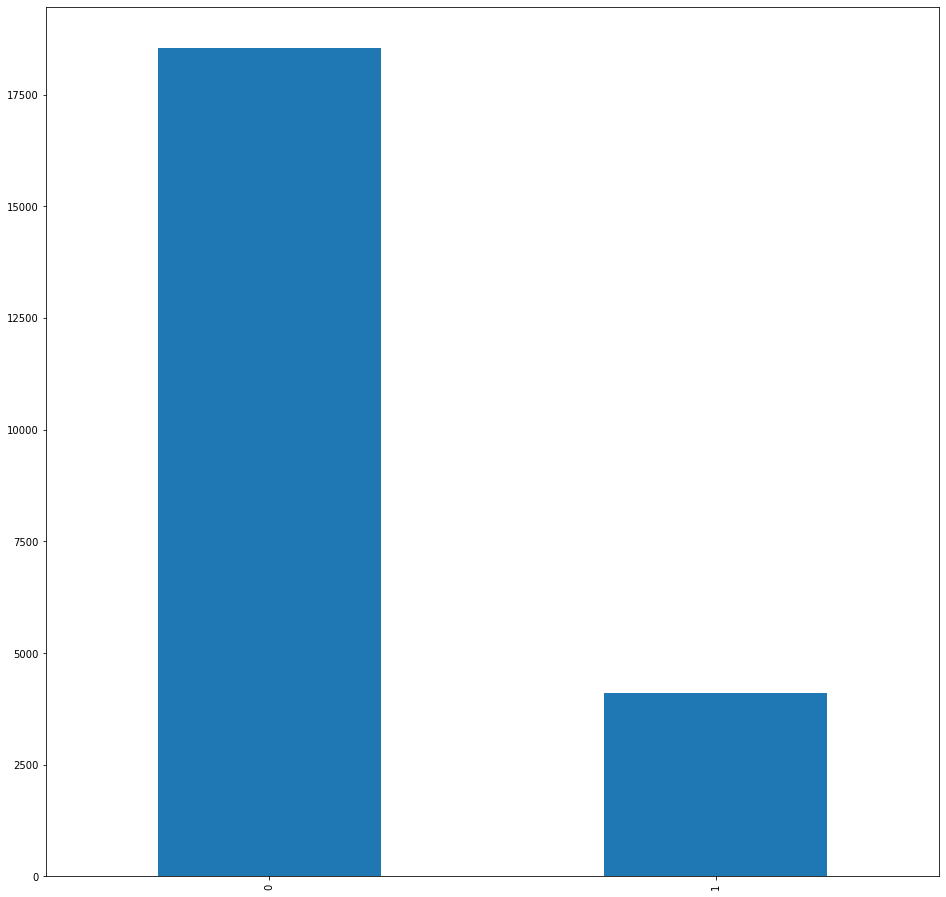

In [22]:
# 분포를 막대 그래프를 사용하여 출력합니다.
df_clean['Recommended IND'].value_counts().plot(kind='bar')

# 분포를 도수분포표로 확인합니다.
df_clean['Recommended IND'].value_counts()

## 4. 데이터 전 처리

상품 추천 여부 예측을 수행하기 위해서 주어진 이커머스 데이터에 대해서 분류 모델을 사용할 것입니다.

이번 파트에서는 `Review Text` 데이터만을 사용하여 예측을 수행하지만, `age`나 `Title` 데이터 등을 추가하여 입력을 확장할 수 있습니다.

분류 모델의 필요한 입력 데이터를 준비 하기위해서 다음과 같은 전처리를 수행하겠습니다.

1. `Review Text` 데이터 자연어 전 처리 - Tfidf 활용
2. 학습 데이터와 테스트 데이터로 나누기

### 4.1. 자연어 전 처리 - Tfidf

자연어 전 처리는 자연어 데이터를 머신러닝의 입력값으로 사용할 수 있도록 변환하는 과정을 의미합니다. 이번 실습에서는 sklearn에서 제공하는 `TfidfVectorizer`를 사용하여 문자열 데이터를 수치 자료형 벡터로 변환해 보겠습니다.

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TfidfVectorizer을 불러옵니다. (stop_words 는 영어로 설정)
vectorizer = TfidfVectorizer(stop_words = 'english')

# 소문자화 'Review Text'데이터를 Tfidf로 변환합니다.
X = vectorizer.fit_transform(df_clean['Review Text'].str.lower())

In [38]:
# Example
sample = ['I am studying project sbuject', 'I am studying natural language preporcessing']

sample_vectorizer = TfidfVectorizer(stop_words = 'english')

sample_matrix = sample_vectorizer.fit_transform(sample)

In [39]:
sample_vectorizer.vocabulary_

{'studying': 5,
 'project': 3,
 'sbuject': 4,
 'natural': 1,
 'language': 0,
 'preporcessing': 2}

In [24]:
# 변환된 X의 크기를 살펴봅니다.
X.shape

(22641, 13855)

In [25]:
# 예측해야 할 변수 'Recommended IND' 만을 선택하여 numpy 형태로 y에 저장합니다.
y = df_clean['Recommended IND']
y = y.to_numpy().ravel() # 1 차원 벡터 형태로 출력하기 위해 ravel 사용

In [40]:
y

array([0, 0, 1, ..., 1, 0, 0])

In [26]:
vectorizer.get_feature_names()

['00',
 '000',
 '00p',
 '02',
 '03',
 '03dd',
 '04',
 '06',
 '0dd',
 '0in',
 '0p',
 '0petite',
 '0r',
 '0verall',
 '0xs',
 '10',
 '100',
 '1000',
 '100lb',
 '100lbs',
 '101',
 '102',
 '102lbs',
 '103',
 '103lb',
 '103lbs',
 '104',
 '104lbs',
 '105',
 '105lb',
 '105lbs',
 '106',
 '106lbs',
 '107',
 '107lb',
 '107lbs',
 '107pound',
 '108',
 '108lbs',
 '109',
 '109lbs',
 '10l',
 '10lbs',
 '10mths',
 '10p',
 '10s',
 '10th',
 '10x',
 '11',
 '110',
 '110lb',
 '110lbs',
 '111',
 '111lbs',
 '112',
 '112lb',
 '112lbs',
 '112llbs',
 '113',
 '113lbs',
 '114',
 '114lb',
 '114lbs',
 '115',
 '115ish',
 '115lb',
 '115lbs',
 '115llbs',
 '116',
 '116bs',
 '116ibs',
 '116lb',
 '116lbs',
 '117',
 '117bl',
 '117lbs',
 '118',
 '118lb',
 '118lbs',
 '119',
 '11and',
 '11in',
 '11inches',
 '12',
 '120',
 '120lb',
 '120lbs',
 '121',
 '122',
 '122lb',
 '122lbs',
 '123',
 '123lb',
 '123lbs',
 '123lbssize',
 '124',
 '124lb',
 '124lbs',
 '125',
 '125b',
 '125ibs',
 '125ish',
 '125lb',
 '125lbs',
 '126',
 '126lbs',

### 4.2. 학습, 테스트 데이터 분리

머신러닝의 성능을 평가 하기 위해서는 전체 데이터를 학습에 사용하지 않고 학습용 데이터와 테스트용 데이터를 나누어 사용합니다.

In [27]:
from sklearn.model_selection import train_test_split

# sklearn에서 제공하는 train_test_split을 사용하여 손 쉽게 분리 할 수 있습니다.
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## 5. 머신러닝 모델 학습

전처리된 데이터를 바탕으로 분류 모델을 학습을 수행하고 학습 결과를 출력 해봅니다.

먼저 기본적인 분류 모델인 **의사결정나무(Decision Tree)**를 사용하여 학습을 수행하고, 다양한 모델들을 살펴봅시다.

### 5.1. 기본 분류 모델 학습 - 의사결정나무

In [28]:
from sklearn.tree import DecisionTreeClassifier

# 의사결정나무 DecisionTreeClassifier class를 가져 옵니다.
model = DecisionTreeClassifier()

# fit 함수를 사용하여 데이터를 학습합니다.
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [29]:
# score 함수를 사용하여 모델의 성능을 출력합니다.
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

1.0
0.8001766394347538


### 5.2. 다양한 분류 모델 학습

의사결정나무 모델 이외의 다양한 분류 알고리즘을 사용하고 그 성능을 비교하여 봅시다.

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from xgboost.sklearn import XGBClassifier


models = []
models.append(('KNN', KNeighborsClassifier()))  # KNN 모델
models.append(('NB-M', MultinomialNB()))  # 멀티노미얼 나이브 베이즈
models.append(('NB-B', BernoulliNB()))  # 베르누이 나이브 베이즈 모델
models.append(('RF', RandomForestClassifier()))  # 랜덤포레스트 모델
models.append(('SVM', SVC(gamma='auto')))  # SVM 모델
models.append(('XGB', XGBClassifier()))  # XGB 모델

for name, model in models:
    model.fit(x_train, y_train)
    msg = "%s - train_score : %f, test score : %f" % (name, model.score(x_train, y_train), model.score(x_test, y_test))
    print(msg)

KNN - train_score : 0.885987, test score : 0.831972
NB-M - train_score : 0.836020, test score : 0.814749
NB-B - train_score : 0.907078, test score : 0.866416
RF - train_score : 0.999945, test score : 0.840804
SVM - train_score : 0.821996, test score : 0.806359
XGB - train_score : 0.947659, test score : 0.872378


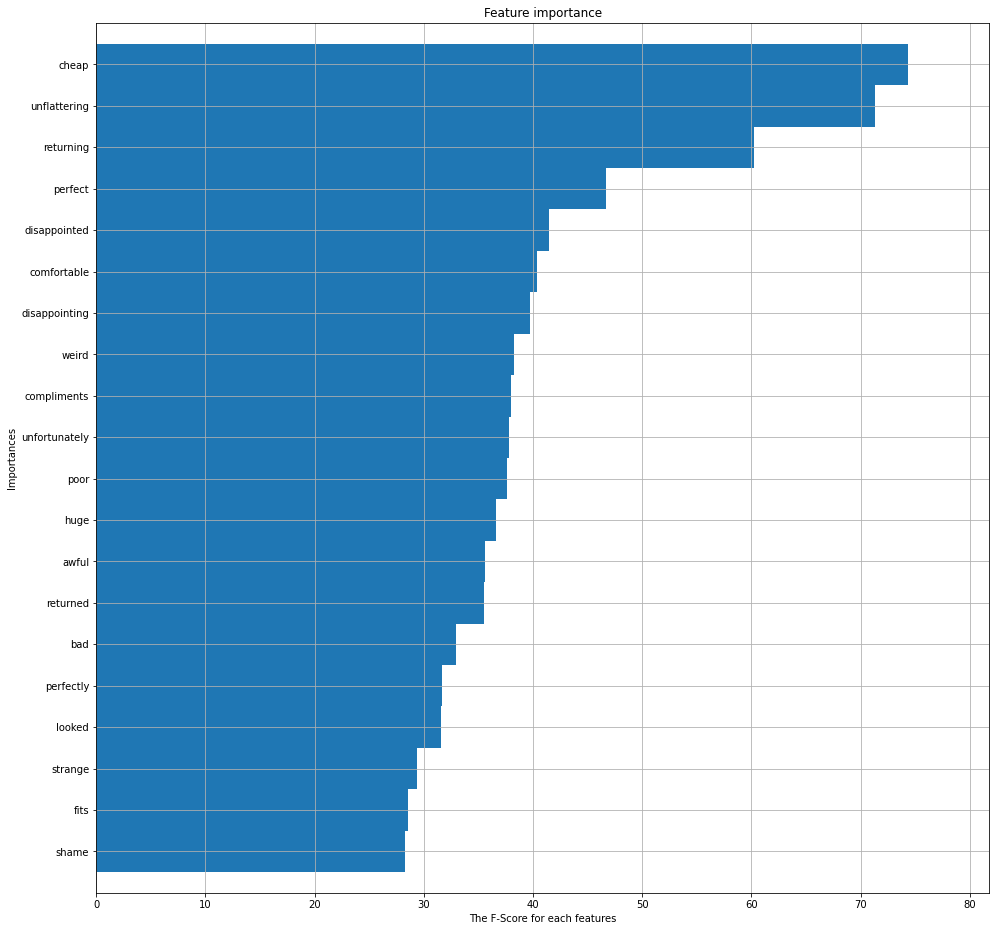

In [31]:
# xgb 모델에서 변수 중요도를 출력합니다.
max_num_features = 20
ax = xgb.plot_importance(models[-1][1], height = 1, grid = True, importance_type = 'gain', show_values = False, max_num_features = max_num_features)
ytick = ax.get_yticklabels()
word_importance = []
for i in range(max_num_features):
    word_importance.append(vectorizer.get_feature_names()[int(ytick[i].get_text().split('f')[1])])

ax.set_yticklabels(word_importance)

plt.rcParams['figure.figsize'] = (10, 15)
plt.xlabel('The F-Score for each features')
plt.ylabel('Importances')
plt.show()

**퀴즈1. 위 학습된 XGBClassifier 모델에서 feature importance가 30번째인 토큰을 문자열 형태로 구하세요.**

첫 번째 feature importance에 해당하는 토큰을 문자열 형태로 하면 'cheap' 입니다.


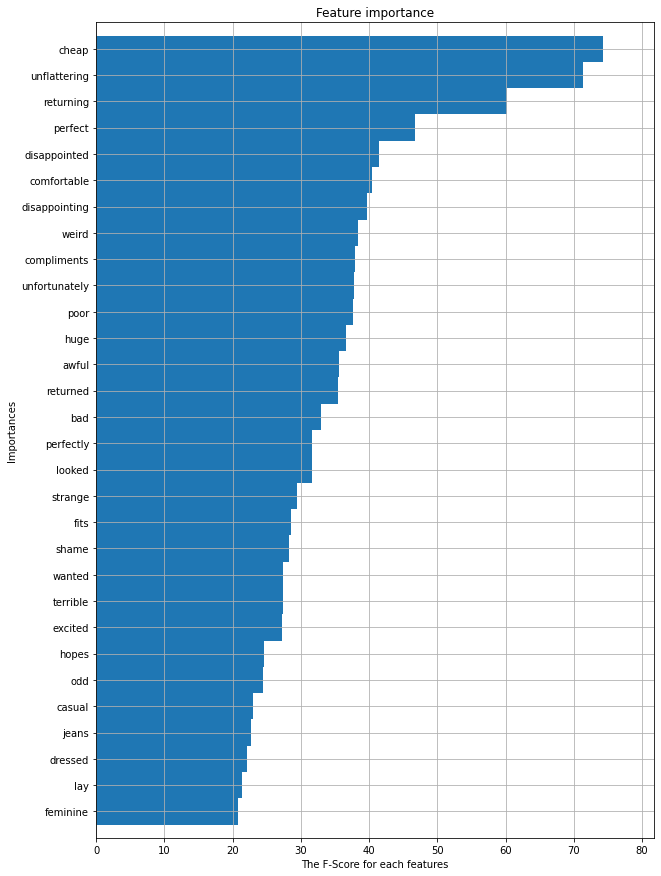

In [41]:
# plot_importance() 함수의 인자 값을 조절하면 쉽게 구할 수 있습니다.
max_num_features = 30
ax = xgb.plot_importance(models[-1][1], height = 1, grid = True, importance_type = 'gain', show_values = False, max_num_features = max_num_features)
ytick = ax.get_yticklabels()
word_importance = []
for i in range(max_num_features):
    word_importance.append(vectorizer.get_feature_names()[int(ytick[i].get_text().split('f')[1])])

ax.set_yticklabels(word_importance)

plt.rcParams['figure.figsize'] = (10, 15)
plt.xlabel('The F-Score for each features')
plt.ylabel('Importances')
plt.show()

In [53]:
# str형으로 문자열만 저장합니다. 예시: quiz_1 = 'cheap'
quiz_1 = 'feminine'

## 6. 평가 및 예측

학습 과정에서 학습 데이터와 테스트 데이터에 대해서 accuracy 계산하여 평가하였습니다.

accuracy의 경우 아래 식에서 알 수 있듯이 얼마나 정확히 예측했는가를 정량적으로 나타냅니다.

$Accuracy = \frac{Number \;of \;correct \;predictions}{Total \; number \;of \;predictions} $

현재 데이터는 `추천을 한다(0)` 는 데이터가 `추천을 하지 않는다(1)` 데이터에 비해 월등히 많은 상황입니다.

이런 경우, `추천 한다(0)`만을 정확히 예측해도 높은 accuracy 값을 가질 수 있습니다.  

그렇기에 이번 실습에서는 또 다른 성능 지표인 recall 값 또한 살펴봐야 합니다.

recall 방식은 `추천을 하지 않는다(1)` 대비 `추천을 한다(0)`의 비율을 나타내기에 accuracy에서 놓칠 수 있는 결과 해석을 보충합니다.

이번 파트에서는 recall 방식을 포함한 또 다른 대표적인 평가 방법에 대해서 알아보고 주어진 데이터에 대해서 예측하는 것을 수행해보겠습니다.

### 6.1. Confusion Matrix

기존 score에서 볼 수 있었던 결과는 accuracy 기반의 결과였습니다. confusion matrix를 출력하여 각 class 별로 예측한 결과에 대해서 자세히 알아봅시다.

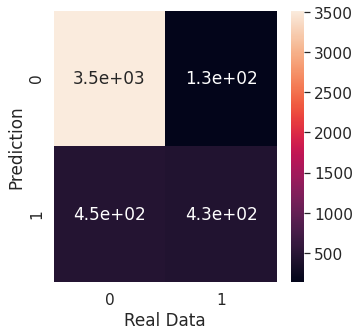

array([[3522,  130],
       [ 448,  429]])

In [43]:
from sklearn.metrics import confusion_matrix

# 의사결정나무 모델에 confusion matrix를 사용하기 위하여 테스트 데이터의 예측값을 저장합니다.
model_predition = model.predict(x_test)

# sklearn에서 제공하는 confusion_matrix를 사용합니다.
cm = confusion_matrix(y_test, model_predition)

# 출력 파트 - seaborn의 heatmap을 사용
plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
ax = sns.heatmap(cm, annot=True)
plt.xlabel('Real Data')
plt.ylabel('Prediction')
plt.show()
cm

위 confusion matrix에서 x 축은 실제 데이터의 label을 의미하고 y 축은 예측한 데이터의 label을 의미합니다.

- **0,0 의 값:** `추천함(Pass)` 이라고 예측했을 때, 실제 데이터가 `추천함(Pass)`인 경우의 개수
- **0,1 의 값:** `추천 하지 않음(Fail)` 이라고 예측했을 때, 실제 데이터가 `추천함(Pass)`인 경우의 개수
- **1,0 의 값:** `추천함(Pass)` 이라고 예측했을 때, 실제 데이터가 `추천 하지 않음(Fail)`인 경우의 개수
- **1,1 의 값:** `추천 하지 않음(Fail)` 이라고 에측했을 때, 실제 데이터가 `추천 하지 않음(Fail)`인 경우의 개수

**퀴즈2. XGBClassifier 모델에서 평가용 데이터(`x_test, y_test`)의 confusion matrix를 구하세요.**

In [45]:
# XGBClassifier의 x_test에 대한 예측값을 구하고 confusion_matrix() 를 사용하면 confusion matrix를 구할 수 있습니다.

# 의사결정나무 모델에 confusion matrix를 사용하기 위하여 테스트 데이터의 예측값을 저장합니다.
model_predition_xgb = models[-1][1].predict(x_test)

# sklearn에서 제공하는 confusion_matrix를 사용합니다.
cm_xgb = confusion_matrix(y_test, model_predition_xgb)

In [46]:
# confusion_matrix() 결과값을 저장합니다. 
quiz_2 = cm_xgb

### 6.2. Precision & Recall

분류 모델의 또 다른 성능 지표로 Precsion과 Recall를 구하여 봅시다.

In [47]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

# sklearn에서 제공하는 recall_score, precision_score를 사용하여 recall과 precision 결과물을 출력합니다.
print("Recall score: {}".format(recall_score(y_test, model_predition)))
print("Precision score: {}".format(precision_score(y_test, model_predition)))

Recall score: 0.48916761687571264
Precision score: 0.7674418604651163


### 6.3. 테스트 데이터의 예측값 출력

In [48]:
# 0번부터 4번까지 5개를 출력해보겠습니다.
for i in range(5): 
    
    # 의사결정나무 모델을 사용하였습니다.
    prediction = model.predict(x_test[i])
    print("{} 번째 테스트 데이터 문장: \n{}".format(i, df_clean['Review Text'][i]))
    print("{} 번째 테스트 데이터의 예측 결과: {}, 실제 데이터: {}\n".format(i, prediction[0], y_test[i]))

0 번째 테스트 데이터 문장: 
Absolutely wonderful - silky and sexy and comfortable
0 번째 테스트 데이터의 예측 결과: 0, 실제 데이터: 0

1 번째 테스트 데이터 문장: 
Love this dress!  it's sooo pretty.  i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite.  i bought a petite and am 5'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.
1 번째 테스트 데이터의 예측 결과: 0, 실제 데이터: 0

2 번째 테스트 데이터 문장: 
I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c
2 번째 테스트 데이터의 예측 

---

## 제출하기

퀴즈 1번, 2번까지 수행 후, 아래 코드를 실행하면 `quize_1, quize_2` 변수가 저장된 `submission.pickle` 파일을 제작하여 채점을 받을 수 있습니다.

**아래 코드를 수정하면 채점이 불가능 합니다.**

In [55]:
import pickle

d = {'quiz_1': quiz_1, 'quiz_2': quiz_2}

with open('submission.pickle', 'wb') as f:
    pickle.dump(d, f)

In [56]:
# 채점을 수행하기 위하여 로그인
import sys
sys.path.append('vendor')
from elice_challenge import check_score, upload

In [57]:
# 제출 파일 업로드
await upload()

이전에 업로드 된 파일 삭제중...
업로드가 완료되었습니다.


In [58]:
# 채점 수행
await check_score()

Quize 1: Pass

Quize 2: Pass

점수는 100 점 입니다.


---

## 챌린지

이번 프로젝트에서 사용한 모델은 학습용 데이터에 대한 **accuracy**는 좋은 성능을 보여주었지만, 평가용 데이터에서 **recall, precision** 지표는 좋은 성능을 보여주지 못 하였습니다. 다양한 방식을 사용하여 평가용 데이터에서의 **recall, precision**을 높일 수 있는 방법을 찾아봅시다.

---

<span style="color:rgb(120, 120, 120)">본 학습 자료를 포함한 사이트 내 모든 자료의 저작권은 엘리스에 있으며 외부로의 무단 복제, 배포 및 전송을 불허합니다.

Copyright @ elice all rights reserved</span>